In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# set the plots to display in the Jupyter notebook
%matplotlib inline

In [82]:
# 9.1 Line Plot

# A. Make a dataframe called foot using the "./international_football_results.csv" file
#    Perform a few exploratory data analysis operations before working with the data set
foot = pd.read_csv('international_football_results.csv')

# Exploratory operations
foot.info() # columns, datatype, non-null count
foot.describe() # count, mean, stats
foot.head() # 5 first rows
foot.columns # name of all columns

# We'll use the .to_datetime method and .dt.year property to set the "year" column from a string to an integer

foot['Date_parsed'] = pd.to_datetime(foot['date'])
foot['Year'] = foot['Date_parsed'].dt.year


foot.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39669 entries, 0 to 39668
Data columns (total 9 columns):
date          39669 non-null object
home_team     39669 non-null object
away_team     39669 non-null object
home_score    39669 non-null int64
away_score    39669 non-null int64
tournament    39669 non-null object
city          39669 non-null object
country       39669 non-null object
neutral       39669 non-null bool
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Date_parsed,Year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11-30,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03-08,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03-07,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03-06,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03-04,1876


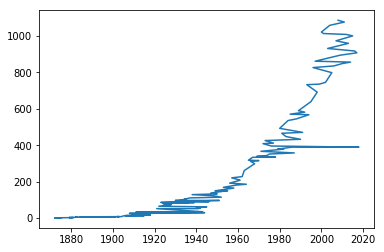

In [83]:
# B. Let's chart how many games occured in each year:
foot['Year'].value_counts().plot()

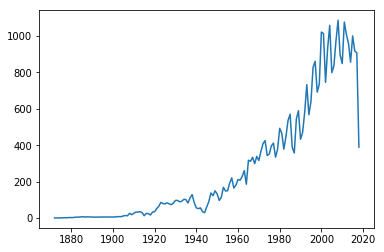

In [84]:
# The years are out of order! Fortunately, we can sort our column by its index with sort_index()
# Finally, we're ready to plot the change over time with .plot()
foot['Year'].value_counts().sort_index().plot()

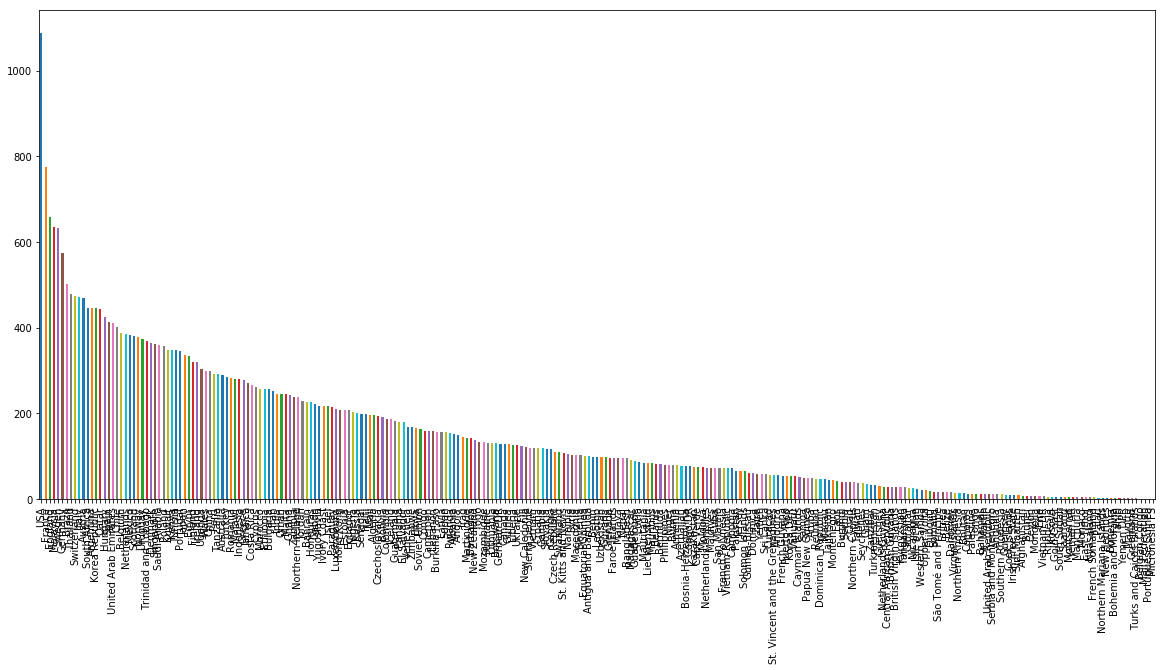

In [108]:
# 9.2 Bar Charts
# A. Let's see how many games each country played, represented as a bar chart
foot['country'].value_counts().plot(kind='bar', figsize=(20,9))

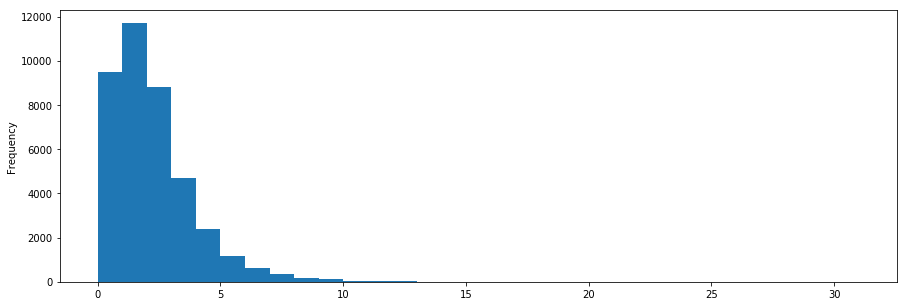

In [125]:
# B. Now let's plot the occurence of specific scores for the home team
bins = foot['home_score'].max()

foot['home_score'].plot(kind='hist', bins = bins, figsize=(15,5))

In [128]:
# C. Instead of sorting from highest to lowest value, let's sort the x axis in ascending order


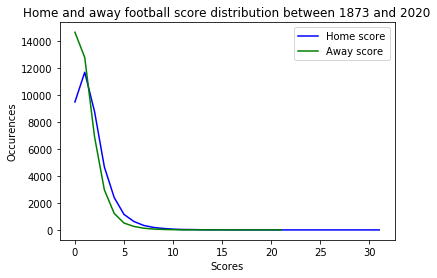

In [143]:
# BONUS: Compare the home_score and away_score value counts to analyze home field advantage
# You will need to use the .apply method to use value_counts on each column of a dataframe

# Create the series for both results
home_score = foot['home_score'].value_counts().sort_index()
away_score = foot['away_score'].value_counts().sort_index()

# Plot the graph with labels and legends
plt.plot(home_score, color='b', label='Home score')
plt.plot(away_score, color='g', label='Away score')

plt.xlabel("Scores")
plt.ylabel("Occurences")
plt.title("Home and away football score distribution between 1873 and 2020")
plt.legend()

In [2]:
# 9.3 Histograms
# A. Let's start with a new dataset. Create a dataframe called choc from the './chocolate_reviews.csv' file
#    Inspect the data using some exploratory data analysis methods
choc = pd.read_csv('chocolate_ratings.csv')
choc.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [91]:
choc.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [97]:
choc['Company\nLocation'].unique()

array(['France', 'U.S.A.', 'Fiji', 'Ecuador', 'Mexico', 'Switzerland',
       'Netherlands', 'Spain', 'Peru', 'Canada', 'Italy', 'Brazil', 'U.K.',
       'Australia', 'Wales', 'Belgium', 'Germany', 'Russia', 'Puerto Rico',
       'Venezuela', 'Colombia', 'Japan', 'New Zealand', 'Costa Rica',
       'South Korea', 'Amsterdam', 'Scotland', 'Martinique', 'Sao Tome',
       'Argentina', 'Guatemala', 'South Africa', 'Bolivia', 'St. Lucia',
       'Portugal', 'Singapore', 'Denmark', 'Vietnam', 'Grenada', 'Israel',
       'India', 'Czech Republic', 'Domincan Republic', 'Finland',
       'Madagascar', 'Philippines', 'Sweden', 'Poland', 'Austria',
       'Honduras', 'Nicaragua', 'Lithuania', 'Niacragua', 'Chile', 'Ghana',
       'Iceland', 'Eucador', 'Hungary', 'Suriname', 'Ireland'], dtype=object)

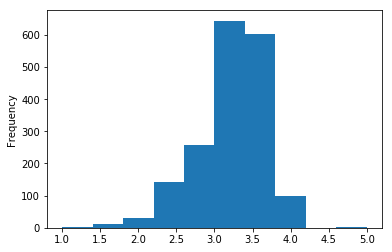

In [42]:
# B. Now, let's explore the distribution of ratings
#    i. Start by plotting the Rating column in a histogram
choc['Rating'].plot(kind='hist')

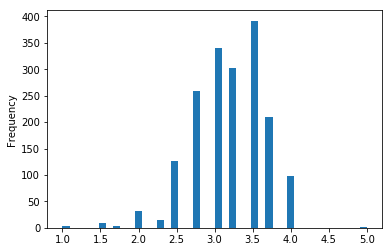

In [58]:
#    ii. Looking good! Let's see how granular we can get
#        Modify the number of bins to change how ranges are distributed

# Rule of thumb to find the ideal number of bins: take the square root of the total len of the data
bins_sqrt = int(np.sqrt(len(choc)))

#plot
choc['Rating'].plot(kind='hist', bins=bins_sqrt )


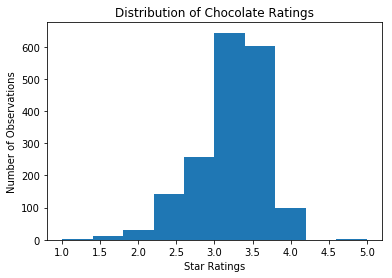

In [59]:
#    iii. Now, let's add some descriptive labels to our chart using matplotlib
choc.Rating.plot(kind='hist')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Observations')
plt.title('Distribution of Chocolate Ratings')
plt.show()

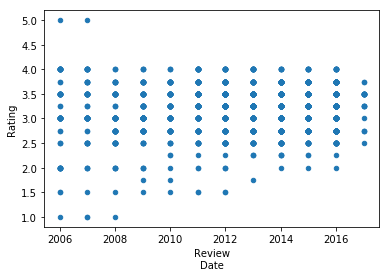

In [62]:
# 9.4 Scatter Plots
# A. Is there a connection between Review Date and Rating? Plot them with a scatter plot
choc.plot(kind='scatter', x='Review\nDate', y='Rating')
# Why is this graph not so helpful?

    # It looks like the data is pretty discreet, no trends show

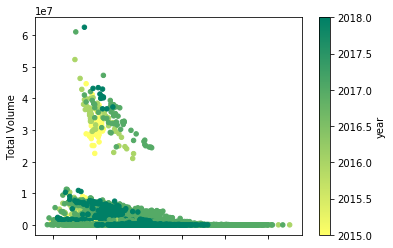

In [80]:
# B. Explore the data from avocado.csv, then scatter plot correlation between Total Volume and AveragePrice

avo = pd.read_csv('avocado.csv')
avo.plot(kind='scatter', y='Total Volume', x='AveragePrice', c='year', cmap='summer_r' )

In [ ]:
# 9.5 Visualizations to Hypotheses
# Create visualizations around any of the above datasets or our superstore datasets
# For at least one of the visualizations, attach a hypothesis or specific claim the chart supports

## Chocolate

Is there an area of origin that has more good ratings than others? Is it the same with the countries where the chocolate is manufactured?


In [144]:
choc.head()

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
choc.describe()

,REF,Review Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


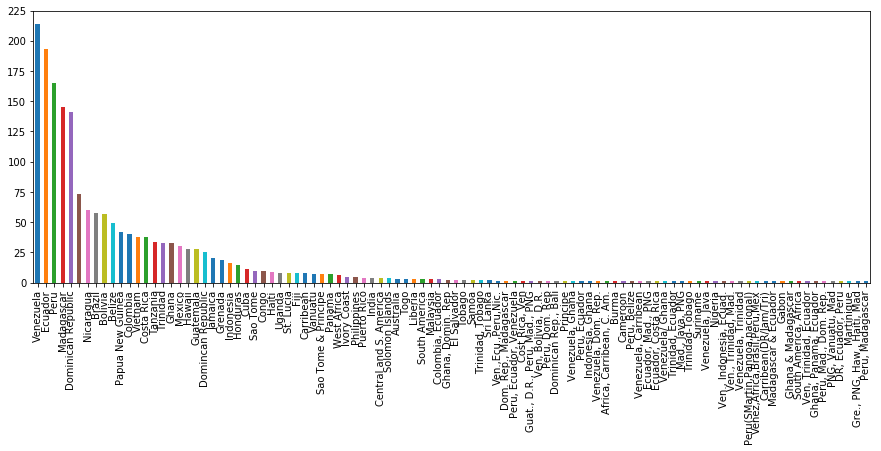

In [149]:
# What is the country producing cacao beans most referenced in that dataframe?
choc['Broad Bean\nOrigin'].value_counts().plot(kind='bar', figsize=(15,5) )

Venezuela is the most producing cacao bean country, are the beans well rated though?

In [7]:
choc[choc['Broad Bean\nOrigin']=='Venezuela']['Rating'].mean()

3.2453271028037385

An average rating of 3.24 is right below the 50% percentile (3.25 for this dataset), so not too impressive. 

### Is is the same for the manufacturing country?

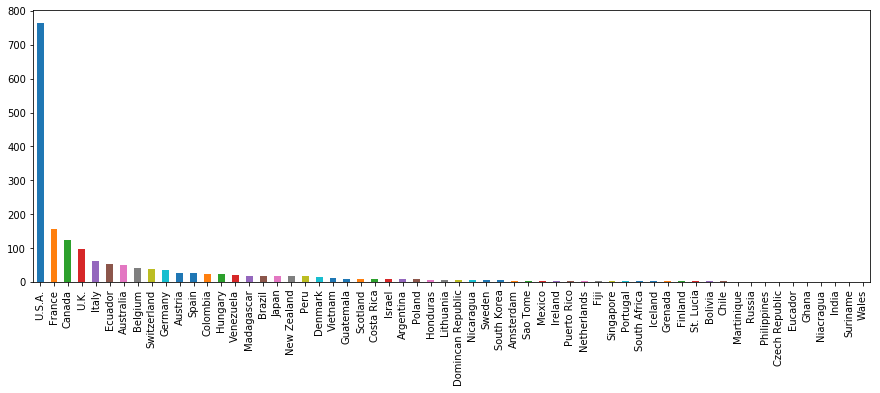

In [150]:
# What is the manufacturing country most represented in the ratings?
choc['Company\nLocation'].value_counts().plot(kind='bar', figsize=(15,5))

In [14]:
choc[choc['Company\nLocation']=='U.S.A.']['Rating'].mean()

3.1541230366492146

3.15! even worse! 

### Is these a correlation between the amount of beans produced of manufactured, and the ratings? 

My first assumption would be that the less a country produces, the better the quality

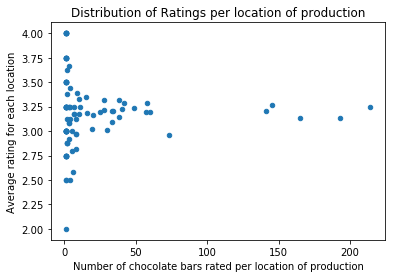

In [6]:
# Group the dataframe by broad bean Origin and get the mean rating for each group
choc_bean_origin = choc.groupby(['Broad Bean\nOrigin']).mean().reset_index()
# Create a dataframe that counts each group's occurences (can we do it straight from Groupby??)

choc_bean_origin_count = choc['Broad Bean\nOrigin'].value_counts()
# value_counts created a series, transform it into a dataframe and mane the colums
choc_bean_origin_count = choc_bean_origin_count.to_frame().reset_index()
choc_bean_origin_count.columns = ['Broad Bean\nOrigin', 'count']

# Merge both dataframes
choc_beans_origin_merged = pd.merge(choc_bean_origin, choc_bean_origin_count, how='left', on='Broad Bean\nOrigin')

#Create a scatter pot
choc_beans_origin_merged.plot(kind='scatter', y='Rating', x='count' )
plt.xlabel('Number of chocolate bars rated per location of production')
plt.ylabel('Average rating for each location')
plt.title('Distribution of Ratings per location of production')
plt.show()


So it looks like the countries most represented in that dataset are producting average rated beans. 

My assumption was that if countries were producing a small amount of beans, the quality would be higher, which doesn't show here... 

### Would that be the same for the manufacturing countries?

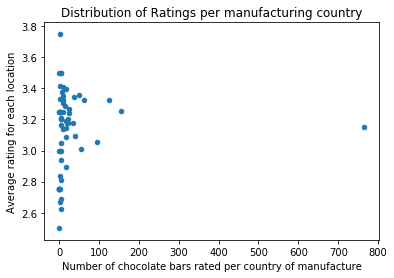

In [7]:
# Group the dataframe by broad bean Origin and get the mean rating for each group
choc_bean_man = choc.groupby(['Company\nLocation']).mean().reset_index()
# Create a dataframe that counts each group's occurences (can we do it straight from Groupby??)

choc_bean_man_count = choc['Company\nLocation'].value_counts()
# value_counts created a series, transform it into a dataframe and mane the colums
choc_bean_man_count = choc_bean_man_count.to_frame().reset_index()
choc_bean_man_count.columns = ['Company\nLocation', 'count']

# Merge both dataframes
choc_beans_man_merged = pd.merge(choc_bean_man, choc_bean_man_count, how='left', on='Company\nLocation')

#Create a scatter pot
choc_beans_man_merged.plot(kind='scatter', y='Rating', x='count' )
plt.xlabel('Number of chocolate bars rated per country of manufacture')
plt.ylabel('Average rating for each location')
plt.title('Distribution of Ratings per manufacturing country')
plt.show()


Same results here... The quantity of chocolates produced in one country doesn't affect the rating... we'll have to find better correlations!

### Note

This dataset doesn't really indicates the quantity produced, just the amount of chocolate references that have been rated, so we can't really assess the quantities produced per se.

